## Confusion Matrix of Iris Dataset using k-NN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [37]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import NearestCentroid

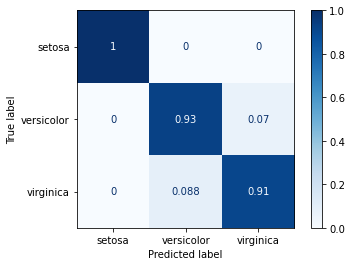

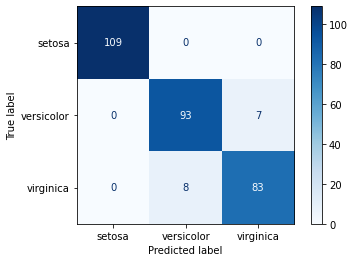

In [38]:
iris = load_iris()

max_seed = 10

predict_list = []
label_list = []
error_count = np.zeros(int(len(iris.target) * 0.2))

for seed in range(max_seed):
    x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed, shuffle=True)

    k = 1

    knn = KNeighborsClassifier(k, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)

    predict_list.extend(predict)
    label_list.extend(y_test)

    equal = np.equal(predict, y_test)
    idx = np.where(equal == False)
    if len(idx[0]) != 0:
        for idx in idx[0]:
            error_count[idx] += 1

max_error = error_count.max()
error_idx = np.where(error_count == max_error)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(label_list, predict_list, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)

In [39]:
from scipy.spatial.distance import euclidean

print("Error Data : ", error_idx[0])
print("-----------------------------------")

k = 3
dist_arr = []

for n in error_idx[0]:
    print("Error data index : ", n)
    print("Error data value : ", x_test[n])
    for idx, data in enumerate(x_train):
        data = data.reshape(1, -1)
        dist = euclidean(x_test[n], data)
        dist_arr.append(dist)
    
    dist = np.argsort(dist_arr)[:k]
    for d in dist:
        print("Error data of NN distance : ", x_train[d], " / label : ", y_train[d])
    print("-----------------------------------")

Error Data :  [15 23]
-----------------------------------
Error data index :  15
Error data value :  [5.5 2.4 3.7 1. ]
Error data of NN distance :  [5.5 2.4 3.8 1.1]  / label :  1
Error data of NN distance :  [5.6 2.5 3.9 1.1]  / label :  1
Error data of NN distance :  [5.7 2.6 3.5 1. ]  / label :  1
-----------------------------------
Error data index :  23
Error data value :  [5.4 3.4 1.7 0.2]
Error data of NN distance :  [5.5 2.4 3.8 1.1]  / label :  1
Error data of NN distance :  [5.6 2.5 3.9 1.1]  / label :  1
Error data of NN distance :  [5.7 2.6 3.5 1. ]  / label :  1
-----------------------------------


## Nearest Centroid Classifier

train size :  120  / test size :  30

Training set score: 0.941667
Test set score: 0.900000
Training Time : 0.0005 sec


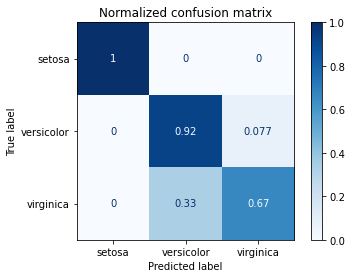

In [40]:
seed = 0

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=seed, shuffle=True)

print("train size : ", len(x_train), " / test size : ", len(x_test))
print()

k = 1

nc = NearestCentroid()
nc.fit(x_train, y_train)

train_score = nc.score(x_train, y_train)

start = time.perf_counter()
test_score = nc.score(x_test, y_test)
end = time.perf_counter() - start

print("Training set score: %f" % train_score)
print("Test set score: %f" % test_score)
print("Training Time : %.4f" % (time.perf_counter() - start), "sec")

disp = ConfusionMatrixDisplay.from_estimator(nc, x_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()